# 数据信息

数据来源：[淘宝用户行为](https://tianchi.aliyun.com/dataset/649)  
UserBehavior.csv  
We random select about 1 million users who have behaviors including click, purchase, adding item to shopping cart and item favoring during **November 25 to December 03, 2017**. The dataset is organized in a very similar form to MovieLens-20M, i.e., each line represents a specific user-item interaction, which consists of **user ID, item ID, item's category ID, behavior type and timestamp**, separated by commas. The detailed descriptions of each field are as follows:

| Field         | Explanation                                                                                          |
|---------------|------------------------------------------------------------------------------------------------------|
| User ID       | An integer, the serialized ID that represents a user                                                 |
| Item ID       | An integer, the serialized ID that represents an item                                                |
| Category ID   | An integer, the serialized ID that represents the category to which the corresponding item belongs   |
| Behavior type | A string, enum-type from ('pv', 'buy', 'cart', 'fav')                                                |
| Timestamp     | An integer, the timestamp of the behavior                                                            |

Note that the dataset contains 4 different types of behaviors, they are：
| Behavior | Explanation                                    |
|----------|------------------------------------------------|
| pv       | Page view of an item's detail page, equivalent to an item click |
| buy      | Purchase an item                               |
| cart     | Add an item to shopping cart                    |
| fav      | Favor an item                                  |

Dimensions of the dataset are：
| Dimension        | Number        |
|------------------|---------------|
| # of users       | 987,994       |
| # of items       | 4,162,024     |
| # of categories  | 9,439         |
| # of interactions| 100,150,807   |

1. 数据清洗和预处理
- 处理缺失值：首先检查数据集中是否有缺失值。对于用户ID、物品ID、类别ID、行为类型和时间戳，任何一个字段的缺失都可能影响分析结果。可以使用填充（如平均值、中位数或众数）或删除含有缺失值的记录的方法来处理。
- 异常值检测：使用箱线图或其他统计方法来识别和处理异常值。异常值可能是由于数据录入错误或其他非典型行为造成的。
- 处理重复记录：检查数据集中是否存在重复的记录。重复的记录可能会导致分析结果的偏差。可以使用数据去重的方法来删除重复项。
- 数据格式统一：确保所有的字段都遵循相同的数据类型和格式。例如，时间戳应该统一为日期时间格式，行为类型应该全部小写等。
 
2. 统计分析  

在数据清洗和预处理之后，可以使用以下统计分析方法来识别数据中的模式和趋势：
- 描述性统计量：计算用户的活动频率、物品的购买次数、各类别的受欢迎程度等基本统计量，如均值、中位数、标准差、最小值和最大值。
- 假设检验：使用t检验或ANOVA来比较不同用户群体或物品类别之间的行为差异是否显著。
- 相关性分析：探索用户行为与时间戳、物品类别等变量之间的关系。例如，分析用户购买行为与时间段的关系。
- 回归分析：建立预测模型来预测用户的购买概率或物品的受欢迎程度。
 
3. 高级分析技术  

为了揭示数据的深层次信息，可以应用以下高级分析技术：
- 时间序列分析：分析用户行为随时间的变化趋势，预测未来的用户行为模式。
- 聚类分析：将用户或物品分为不同的群组，根据他们的行为模式或特征进行分类。
- 主成分分析（PCA）：降维以识别影响用户行为的主要因素。
 
4. 见解和建议

根据分析结果，可以提出以下见解和建议：

- 提高销售额：针对购买频率高的用户群体，提供个性化的促销活动和优惠。
- 优化客户体验：分析用户在购物车中添加但不购买的物品，改进产品描述和图片，提供更好的购物体验。
- 预测市场动向：通过时间序列分析，预测哪些类别的物品可能会在未来流行，从而提前准备库存和营销策略。
 
5. 分析报告

最后，准备一份详细的分析报告，包括以下内容：

- 数据清洗和预处理的步骤：详细说明如何处理缺失值、异常值、重复记录和数据格式统一。
- 分析方法的选择和应用：解释为什么选择特定的统计方法和技术，并描述如何应用它们。
- 关键发现：总结分析过程中发现的最重要的模式和趋势。
- 基于发现的建议：提供具体的行动方案，以及预期的结果和效益。

In [3]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Python连接MySQL数据库
练习从mysql数据库获取数据，与本notebook关系不大，数据获取的来源不同，可直接略过

In [4]:
import db
table_name = 'UserBehavior'
query_count = f'select count(*) from {table_name}'
pd.DataFrame(db.query_data(query_count))
# db.get_table_row_count(table_name)

,count(*)
0,12270641


In [5]:
# 执行查询表的列名的SQL语句
query_col = f'SHOW COLUMNS FROM {table_name};'
pd.DataFrame(db.query_data(query_col))

,Field,Type,Null,Key,Default,Extra
0,User_Id,int,NO,PRI,None,
1,Item_Id,int,NO,PRI,None,
2,Category_Id,int,NO,PRI,None,
3,Behavior_type,varchar(50),NO,PRI,None,
4,Timestamp,bigint,NO,PRI,None,


In [6]:
query_type = f'select distinct(Behavior_type) from {table_name}'
pd.DataFrame(db.query_data(query_type))

,Behavior_type
0,pv
1,cart
2,fav
3,buy


In [7]:
# 保存csv文件
csv_file_name = table_name + '.csv'
db.save_table_to_csv(table_name,csv_file_name)

# 读取csv，开始项目

In [3]:
# 读取csv文件，添加列名，改变dtype，进行数据压缩
raw_df = pd.read_csv('./UserBehavior.csv', names=['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'], 
                     dtype={'user_id': 'int32', 
                            'item_id': 'int32', 
                            'category_id': 'int32',
                           'behavior_type':'category'})

In [4]:
# 将 timestamp 列转换为日期时间格式
raw_df['timestamp'] = pd.to_datetime(raw_df['timestamp'], unit='s')

In [5]:
display(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int32         
 1   item_id        int32         
 2   category_id    int32         
 3   behavior_type  category      
 4   timestamp      datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(3)
memory usage: 2.0 GB


None

In [6]:
# 查看数据形状
print(raw_df.shape)

# 查看列名
print(list(raw_df.columns))

(100150807, 5)
['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']


In [7]:
# 查看描述性统计信息
raw_df.describe()

,user_id,item_id,category_id,timestamp
count,1.001508e+08,1.001508e+08,1.001508e+08,100150807
mean,5.069431e+05,2.579775e+06,2.696380e+06,2017-11-29 10:27:56.872216320
min,1.000000e+00,1.000000e+00,8.000000e+01,1902-05-07 22:32:46
25%,2.524290e+05,1.295225e+06,1.320293e+06,2017-11-27 05:50:43
50%,5.040150e+05,2.580735e+06,2.671397e+06,2017-11-29 14:09:56
75%,7.609490e+05,3.862042e+06,4.145813e+06,2017-12-02 01:44:42
max,1.018011e+06,5.163070e+06,5.162429e+06,2037-04-09 05:22:35
std,2.940605e+05,1.488056e+06,1.463155e+06,NaN


# 数据清洗

In [8]:
#缺失值处理
raw_df.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
dtype: int64

In [9]:
# 数据日期是November 25 to December 03, 2017
# 设置日期范围的起始和结束日期
start_date = pd.to_datetime("2017-11-25")
end_date = pd.to_datetime("2017-12-03")
date_filtered_df = raw_df[(raw_df['timestamp'] >= start_date) & (raw_df['timestamp'] <= end_date)]

In [10]:
# 检测重复值       
duplicate_rows = date_filtered_df.duplicated(keep=False)
duplicate_df = date_filtered_df[duplicate_rows]

In [11]:
print(len(duplicate_df))
# 因该是用户同一时间同样商品购买了多个，不做删除处理

94


In [12]:
date_filtered_df.loc[:, 'date'] = date_filtered_df['timestamp'].dt.date
date_filtered_df.loc[:, 'hour'] = date_filtered_df['timestamp'].dt.hour

/var/folders/97/1wmfq3zd5vs1f80vgjcmklz40000gn/T/ipykernel_76242/270360324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filtered_df.loc[:, 'date'] = date_filtered_df['timestamp'].dt.date
/var/folders/97/1wmfq3zd5vs1f80vgjcmklz40000gn/T/ipykernel_76242/270360324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filtered_df.loc[:, 'hour'] = date_filtered_df['timestamp'].dt.hour


In [13]:
new_df = date_filtered_df.drop('timestamp', axis=1)

In [14]:
new_df.sample()

,user_id,item_id,category_id,behavior_type,date,hour
99947278,990386,4233241,4244487,fav,2017-11-26,16


## Part1. 流量分析  
访问量(PV)：Page View, 基于用户每次对淘宝页面的刷新次数，用户每刷新一次页面或者打开新的页面就记录就算一次访问。  
独立访问量(UV)：Unique Visitor，一个用户若多次访问淘宝只记录一次。

In [15]:
pv_daily = new_df.groupby('date')['user_id'].count()

In [16]:
pv_daily = pv_daily.reset_index() 
pv_daily = pv_daily.rename(columns={'user_id':'pv_daily'})

In [17]:
pv_daily

,date,pv_daily
0,2017-11-25,10511605
1,2017-11-26,10571046
2,2017-11-27,10013457
3,2017-11-28,9884189
4,2017-11-29,10319066
5,2017-11-30,10541698
6,2017-12-01,11171515
7,2017-12-02,13940949
8,2017-12-03,130


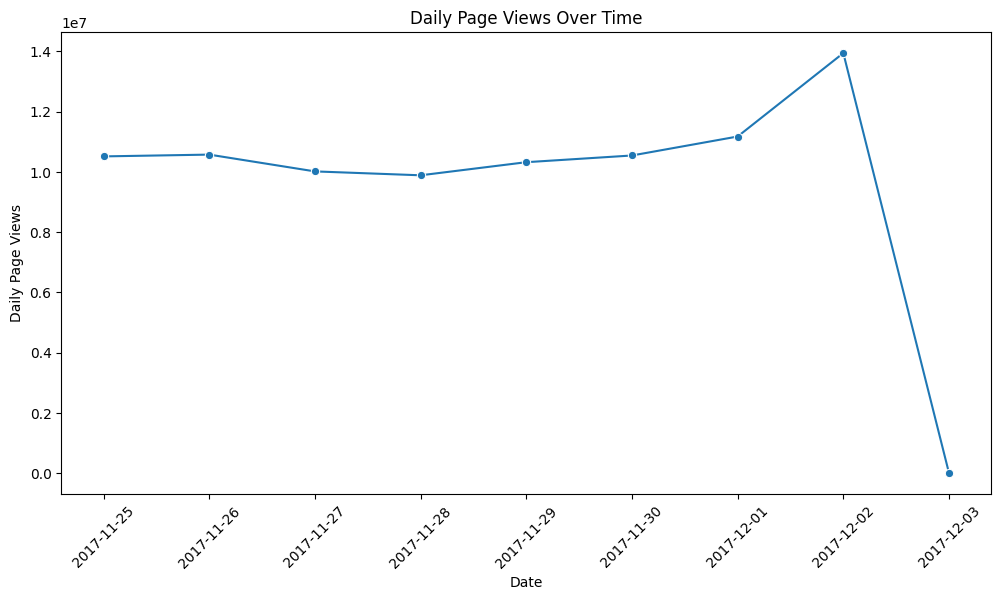

In [18]:
# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='pv_daily', data=pv_daily, marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Page Views')
plt.title('Daily Page Views Over Time')
plt.xticks(rotation=45)
plt.show()